In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

In [10]:
# 设置问题的参数，定义遗传算法的优化过程和问题的范围。
DNA_SIZE = 24  # 基因长度
POP_SIZE = 80  # 种群大小
CROSSOVER_RATE = 0.6  # 交叉概率
MUTATION_RATE = 0.01  # 变异概率
N_GENERATIONS = 100  # 迭代次数
X_BOUND = [-2.048, 2.048]  # x范围
Y_BOUND = [-2.048, 2.048]  # y范围


# Rosenbrock函数
def F(x, y):
    return 100.0 * (x ** 2.0 - y) ** 2.0 + (1 - x) ** 2.0


def plot_3d(ax):
    X = np.linspace(*X_BOUND, 100)
    Y = np.linspace(*Y_BOUND, 100)
    X, Y = np.meshgrid(X, Y)
    Z = F(X, Y)
    ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=cm.coolwarm)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')
    plt.pause(3)
    plt.show()


# 适应度函数，通过F(x,y)计算
def get_fitness(pop):
    x, y = translate_dna(pop)
    pred = F(x, y)
    return pred


# 将二进制的基因型转换为十进制数
def translate_dna(pop):
    # 前DNA_SIZE位表示X，后DNA_SIZE位表示Y
    x_pop = pop[:, 0:DNA_SIZE]
    y_pop = pop[:, DNA_SIZE:]

    x = x_pop.dot(2 ** np.arange(DNA_SIZE)[::-1]) / float(2 ** DNA_SIZE - 1) * (X_BOUND[1] - X_BOUND[0]) + X_BOUND[0]
    y = y_pop.dot(2 ** np.arange(DNA_SIZE)[::-1]) / float(2 ** DNA_SIZE - 1) * (Y_BOUND[1] - Y_BOUND[0]) + Y_BOUND[0]
    return x, y


# 对基因进行复制、交叉或编译处理
def crossover_and_mutation(pop, CROSSOVER_RATE=0.8):
    new_pop = []
    for father in pop:  # 遍历种群中的每一个个体，将该个体作为父亲
        child = father  # 孩子先得到父亲的全部基因（这里我把一串二进制串的那些0，1称为基因）
        if np.random.rand() < CROSSOVER_RATE:  # 产生子代时不是必然发生交叉，而是以一定的概率发生交叉
            mother = pop[np.random.randint(POP_SIZE)]  # 再种群中选择另一个个体，并将该个体作为母亲
            cross_points = np.random.randint(low=0, high=DNA_SIZE * 2)  # 随机产生交叉的点
            child[cross_points:] = mother[cross_points:]  # 孩子得到位于交叉点后的母亲的基因
        mutation(child)  # 每个后代有一定的机率发生变异
        new_pop.append(child)

    return new_pop


# 变异函数
def mutation(child, MUTATION_RATE=0.003):
    if np.random.rand() < MUTATION_RATE:  # 以MUTATION_RATE的概率进行变异
        mutate_point = np.random.randint(0, DNA_SIZE)  # 随机产生一个实数，代表要变异基因的位置
        child[mutate_point] = child[mutate_point] ^ 1  # 将变异点的二进制为反转


In [11]:
# 选择产生新的种群：
# np.arange(POP_SIZE)：创建一个从0到POP_SIZE-1的数组，表示种群中个体的索引。
# np.random.choice：根据适应度值进行选择操作，从种群中选择个体的索引。
# size=POP_SIZE：选择与种群大小相同的个体数量。
# replace=True：允许选择重复的个体，即一个个体可以被选择多次。这是为了使适应度较高的个体有更多的机会被选择。
# p=(fitness) / (fitness.sum())：指定选择每个个体的概率。计算每个个体的选择概率时，使用适应度值除以适应度值的总和，以确保概率之和为1。
def select(pop, fitness):  # nature selection wrt pop's fitness
    idx = np.random.choice(np.arange(POP_SIZE), size=POP_SIZE, replace=True,
                           p=(fitness) / (fitness.sum()))

    print("select: ", pop[idx])
    return pop[idx]

In [12]:
def print_info(pop, generation):
    fitness = get_fitness(pop)
    max_fitness_index = np.argmax(fitness)
    print("Generation:", generation)
    print("max_fitness:", fitness[max_fitness_index])
    x, y = translate_dna(pop)
    print("最优的基因型：", pop[max_fitness_index])
    print("Best (x, y):", (x[max_fitness_index], y[max_fitness_index]))
    print("Best F(x, y):", F(x[max_fitness_index], y[max_fitness_index]))

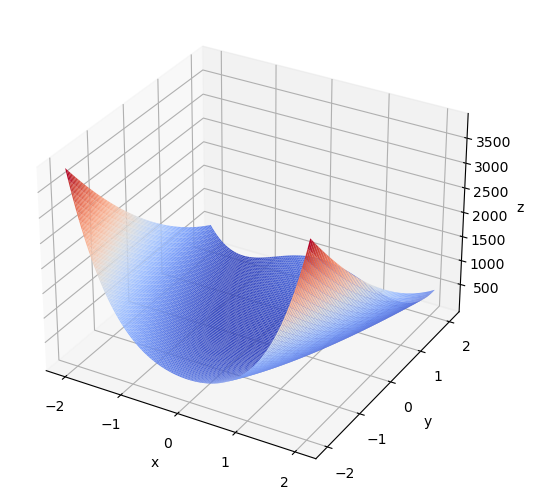

x:  [ 0.76773015 -1.20077143 -1.3420876  -1.59866135  1.98791943 -0.30624623
 -1.62673337 -1.08891913  0.91099847 -0.36935122  0.72389689 -0.5081813
  0.76219572 -1.02332147  0.35961635  0.06480115 -0.1375702  -1.88656396
  1.58318576 -1.4636921   0.88060564 -0.27170107  0.72618889 -1.25409102
 -1.25922017  1.95374243  1.32453072  1.28109761  0.98390667 -0.03670691
 -0.81662981 -0.34445791 -0.50067886 -0.89783367 -1.2713813   0.25760951
 -1.8726953  -1.30708296  1.8885266  -1.71196751  1.21950386 -1.1855666
 -0.15514686 -0.15226869 -0.83758464 -0.42354263  1.70219895  0.8535534
 -1.08189789  0.45241079 -1.50490426  1.51912277 -0.43882632  1.03227875
  0.4323583   1.5414758   0.18034852  1.68633689  1.67780662 -1.255227
  1.29643282 -1.86758251 -1.75336937 -0.69070964 -1.40772189 -1.58779367
 -0.52772867  0.66053532 -1.58257492  0.95317327  0.06014905  2.00497534
  1.13651997  0.33495107 -1.18591987 -0.38598452 -0.46875503 -0.75563444
 -0.30899623  0.13128089] 
y:  [-0.71397477  1.09415

In [14]:
fig = plt.figure()
ax = Axes3D(fig, auto_add_to_figure=False)
fig.add_axes(ax)
plt.ion()
plot_3d(ax)
pop = np.random.randint(2, size=(POP_SIZE, DNA_SIZE * 2))  # matrix (POP_SIZE, DNA_SIZE)
for generation in range(N_GENERATIONS):  # 迭代N代
    x, y = translate_dna(pop)
    print("x: ",x,"\ny: ",y)
    if 'sca' in locals():
        sca.remove()
    sca = ax.scatter(x, y, F(x, y), c='black', marker='o')
    plt.show()
    plt.pause(0.1)
    pop = np.array(crossover_and_mutation(pop, CROSSOVER_RATE))
    fitness = get_fitness(pop)
    pop = select(pop, fitness)  # 选择生成新的种群
    print_info(pop, generation + 1)
# print_info(pop)
plt.ioff()
plot_3d(ax)